# First-Order Signal Variance Verification

In [2]:
%run imports.py

seed = 4
np.random.seed(seed)
tf.random.set_seed(seed)

All packages loaded successfully.


In [3]:
# --- Generate synthetic 2D data ---
def true_function(x):
    return np.sin(2*x)


n = 1000
noise = 0.01
X = np.random.normal(0, 1, size=n)
y = true_function(X) + np.random.normal(0, noise, size=n)
y_mean = 0.42382154575455366 # the mean used the standardise the full dataset
y_std = 12.672855701139433 # the standard deviation used to standardise the full dataset
y = (y - y_mean) / y_std

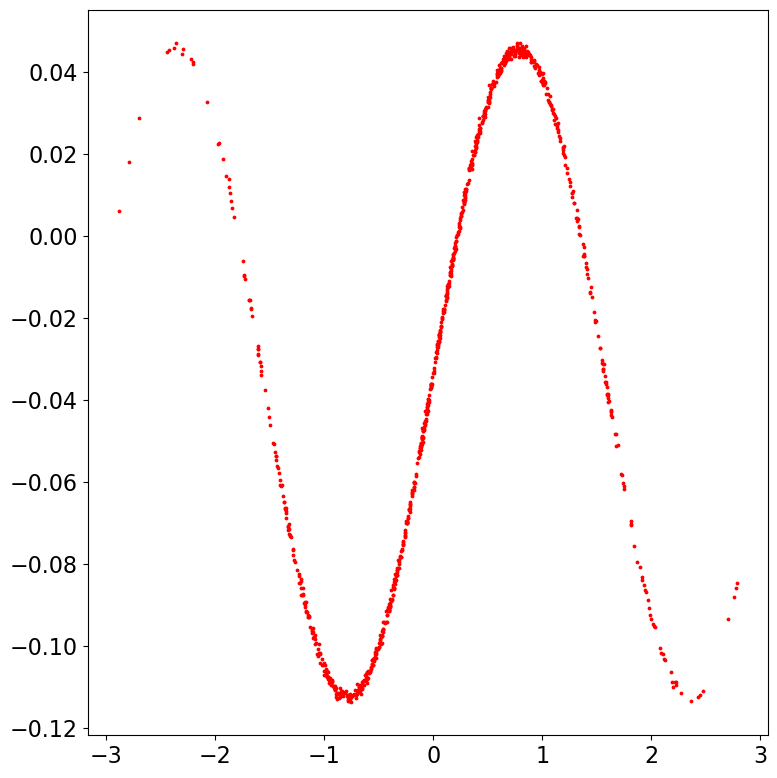

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(X,y, color='red', s=3)
plt.tight_layout()
plt.show()

In [5]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Build RBF kernel GP model
kernel = gpflow.kernels.SquaredExponential()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

model.kernel.lengthscales.assign(2.493)
#model.kernel.lengthscales.assign(2.388)
gpflow.set_trainable(model.kernel.lengthscales, False)



# Optimize
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(
    model.training_loss,
    model.trainable_variables,
    options=dict(maxiter=1000)
)

gpflow.utilities.print_summary(model)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 141.665 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ False       │ ()      │ float64 │   2.493 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │   1e-06 │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [6]:
X_test = np.linspace(-15, 15, 100).reshape(-1,1)

mean, var = model.predict_f(X_test)

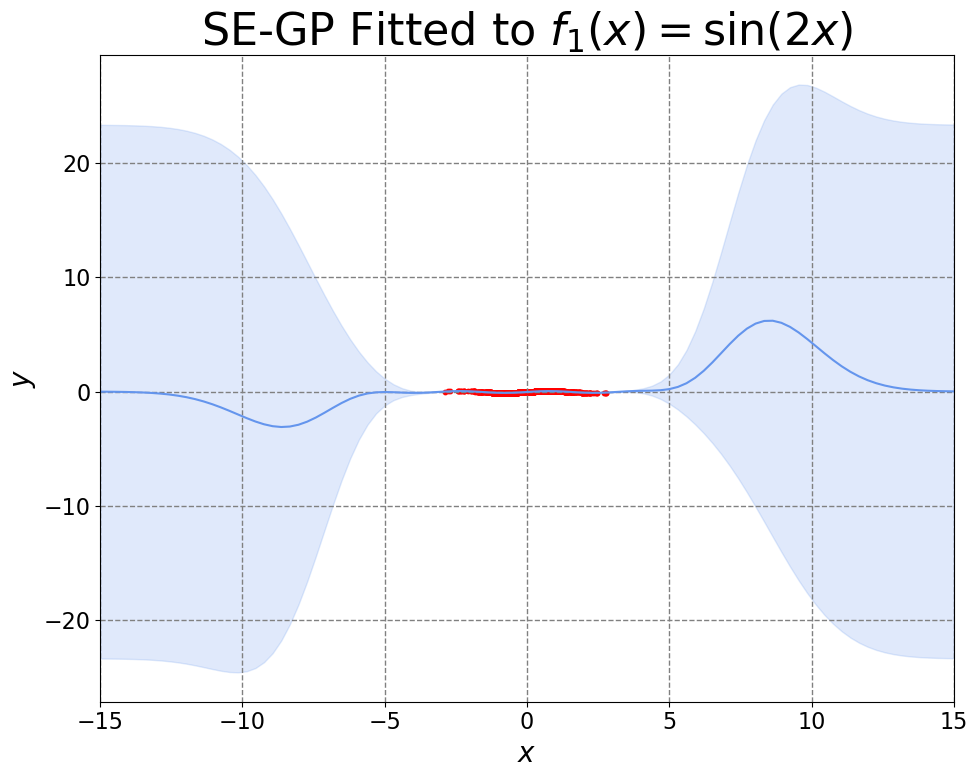

In [7]:
plt.figure(figsize=(10,8))

plt.scatter(X,y, color='red', s=10)
plt.plot(X_test, mean, 'cornflowerblue', label='GP Poserior')
lower_bound = tf.squeeze(mean - 1.96 * tf.sqrt(var))
upper_bound = tf.squeeze(mean + 1.96 * tf.sqrt(var))
plt.fill_between(X_test.squeeze(), lower_bound, upper_bound, color='cornflowerblue', alpha=0.2, label='95% Confidence Interval')
plt.xlim([-15,15])
plt.grid(True)
plt.title('SE-GP Fitted to $f_1(x) = \\sin(2x)$')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.tight_layout()
plt.show()

In [8]:
# --- Generate synthetic 2D data ---
def true_function(x):
    return 3*x**3


seed = 4
np.random.seed(seed)
tf.random.set_seed(seed)

n = 1000
noise = 0.01
X = np.random.normal(0, 1, size=n)
y = true_function(X) + np.random.normal(0, noise, size=n)
y_mean = 0.42382154575455366
y_std = 12.672855701139433
y = (y - y_mean) / y_std

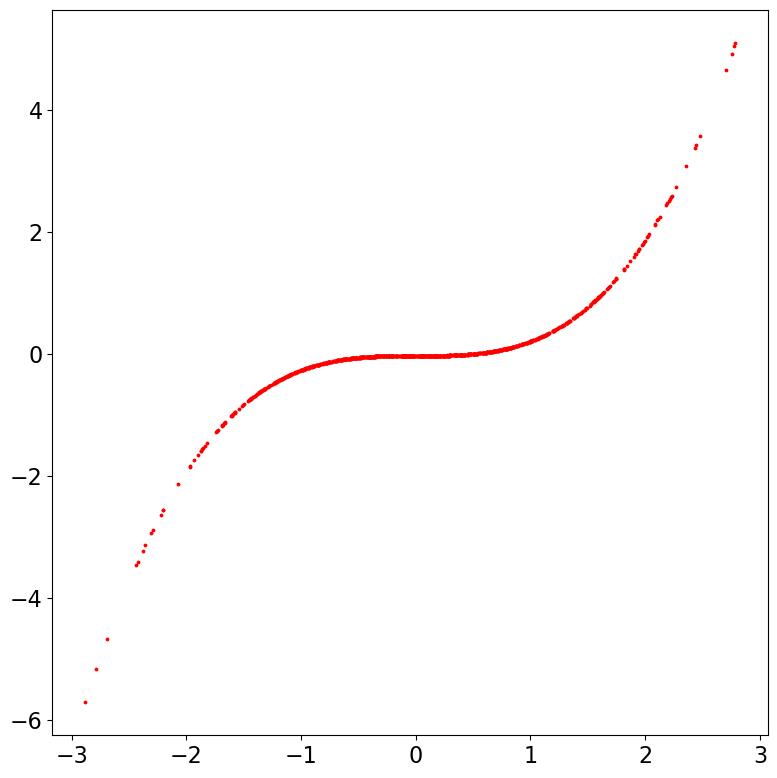

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X,y, color='red', s=3)
plt.tight_layout()
plt.show()

In [10]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Build RBF kernel GP model
kernel = gpflow.kernels.SquaredExponential()
model = gpflow.models.GPR(data=(X, y), kernel=kernel, mean_function=None)

model.kernel.lengthscales.assign(1.542)
gpflow.set_trainable(model.kernel.lengthscales, False)


# Optimize
opt = gpflow.optimizers.Scipy()
opt_logs = opt.minimize(
    model.training_loss,
    model.trainable_variables,
    options=dict(maxiter=1000)
)

gpflow.utilities.print_summary(model)

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │   value │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 80.9593 │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ False       │ ()      │ float64 │  1.542  │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │  1e-06  │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

In [11]:
X_test = np.linspace(-10, 10, 100).reshape(-1,1)

mean, var = model.predict_f(X_test)

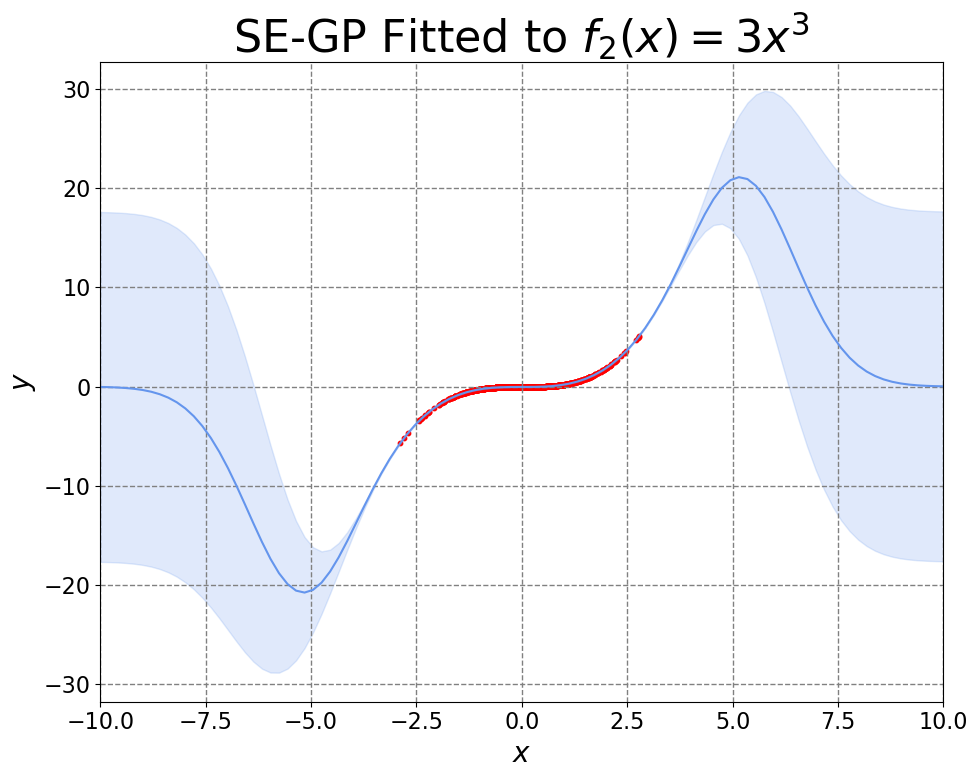

In [12]:
plt.figure(figsize=(10,8))

plt.scatter(X,y, color='red', s=10)
plt.plot(X_test, mean, 'cornflowerblue', label='GP Poserior')
lower_bound = tf.squeeze(mean - 1.96 * tf.sqrt(var))
upper_bound = tf.squeeze(mean + 1.96 * tf.sqrt(var))
plt.fill_between(X_test.squeeze(), lower_bound, upper_bound, color='cornflowerblue', alpha=0.2, label='95% Confidence Interval')
plt.xlim([-10,10])
plt.grid(True)
plt.title('SE-GP Fitted to $f_2(x) = 3x^3$')
plt.ylabel('$y$')
plt.xlabel('$x$')
plt.tight_layout()
plt.show()